In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19281 bytes


In [3]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA_male_extreme = pd.read_excel("OSA_extreme_male.xlsx")


In [4]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


In [5]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Age', 'Cervical', 'BMI']


In [6]:
import numpy as np

X = np.array(df_OSA_male_extreme[columns])
print(X)


[[ 80.         173.          32.          40.          26.7299275 ]
 [109.         190.          32.          42.          30.19390582]
 [ 86.         169.          39.          42.          30.11099051]
 ...
 [ 90.         179.          57.          42.          28.08901095]
 [105.         180.          35.          45.          32.40740741]
 [ 90.         180.          50.          42.          27.77777778]]


In [7]:
df_OSA_male_extreme[columns][0:4]

,Weight,Height,Age,Cervical,BMI
0,80,173,32,40,26.729927
1,109,190,32,42,30.193906
2,86,169,39,42,30.110991
3,145,172,47,44,49.012980


In [8]:
df_OSA_male_extreme.OSA = df_OSA_male_extreme.OSA.map({'Healthy': 0, 'Severe': 1})

In [9]:
df_OSA_male_extreme.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,0,26.729927
1,P0006,hombre,2.0,109,190,32,42,0,30.193906
2,P0007,hombre,34.0,86,169,39,42,1,30.110991
3,P0008,hombre,60.0,145,172,47,44,1,49.012980
4,P0013,hombre,3.7,90,180,36,40,0,27.777778


In [10]:
y = np.array(df_OSA_male_extreme['OSA'])
y.shape

(278,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [13]:
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))
print(y_test)

Training data cases:  236  Test data cases:  42
[0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 1 0 0 1 0]


#Logistic


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from xgboost import XGBClassifier

#Nested Support vector machine


In [41]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = SVC(random_state=1)
	# define search space
	#space = dict()
	#space['n_estimators'] = [100, 250, 500, 600]  #random forest para
	#space['max_features'] = [2, 3, 4] 
	#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]} # decision tree para
	#SVM PARAM
	SVMparam_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
	# define search
	search = GridSearchCV(model, SVMparam_grid, scoring='accuracy', cv=cv_inner,refit = True, verbose = 3)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.440 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.440 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.440 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.702 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.723 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

#Decision tree

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = DecisionTreeClassifier(random_state=1)
	# define search space
	#space = dict()
	#space['n_estimators'] = [100, 250, 500, 600]  #random forest para
	#space['max_features'] = [2, 3, 4] 
	tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]} # decision tree para

	# define search
	search = GridSearchCV(model, tree_para, scoring='accuracy', cv=cv_inner,refit = True, verbose = 3)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

#Random tree


In [36]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 600]  #random forest para
	space['max_features'] = [2, 3, 4] 
	#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]} # decision tree para

	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner,refit = True, verbose = 3)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ..max_features=2, n_estimators=100;, score=0.738 total time=   0.1s
[CV 2/3] END ..max_features=2, n_estimators=100;, score=0.675 total time=   0.1s
[CV 3/3] END ..max_features=2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 1/3] END ..max_features=2, n_estimators=250;, score=0.750 total time=   0.4s
[CV 2/3] END ..max_features=2, n_estimators=250;, score=0.687 total time=   0.4s
[CV 3/3] END ..max_features=2, n_estimators=250;, score=0.759 total time=   0.4s
[CV 1/3] END ..max_features=2, n_estimators=500;, score=0.750 total time=   0.7s
[CV 2/3] END ..max_features=2, n_estimators=500;, score=0.699 total time=   0.8s
[CV 3/3] END ..max_features=2, n_estimators=500;, score=0.759 total time=   0.7s
[CV 1/3] END ..max_features=2, n_estimators=600;, score=0.750 total time=   0.9s
[CV 2/3] END ..max_features=2, n_estimators=600;, score=0.711 total time=   0.9s
[CV 3/3] END ..max_features=2, n_estimators=600;

KeyboardInterrupt: ignored

# XGBOOST NESST

In [40]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = XGBClassifier(random_state=1)
	# define search space
  space = dict()
  space['n_estimators'] = [100, 250, 500, 600]
  space['learning_rate'] = [0.01, 0.05, 0.1, 0.3]
  space['max_depth'] = [2, 3, 5, 6]

	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.571, est=0.744, cfg={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
>acc=0.821, est=0.676, cfg={'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
>acc=0.714, est=0.724, cfg={'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
>acc=0.750, est=0.756, cfg={'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 600}
>acc=0.714, est=0.720, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
>acc=0.893, est=0.696, cfg={'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
>acc=0.607, est=0.716, cfg={'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
>acc=0.607, est=0.736, cfg={'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250}
>acc=0.778, est=0.658, cfg={'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
>acc=0.593, est=0.741, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.705 (0.103)


#Logistic regression and predict

In [ ]:
from sklearn.linear_model import LogisticRegression


# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = LogisticRegression(random_state=1)
	# define search space
  space = dict()
  space['penalty'] = ['l2']
  space['C'] = [100, 10, 1.0, 0.1, 0.01]
	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

In [44]:
#TRAIN AND PREDICT DECISION TREE
#model = DecisionTreeClassifier(max_depth=5,criterion='gini' )
#model = LogisticRegression(max_depth=5,criterion='gini' )
#model = XGBClassifier(max_depth=5,criterion='gini' )
#model = RandomForestClassifier(max_depth=5,criterion='gini' )
model = SVC(C= 1, gamma= 0.01, kernel= 'rbf' )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [50]:
y_pred[0:5]


array([1, 1, 1, 1, 0])

In [51]:
y_test[0:5]

array([0, 1, 1, 0, 0])

In [47]:
print(len(y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

27
Accuracy: 0.6666666666666666
Accuracy Score : 0.6666666666666666
Precision Score : 0.6666666666666666
Recall Score : 0.6153846153846154
F1 Score : 0.64


In [46]:
import matplotlib.pyplot as plt

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

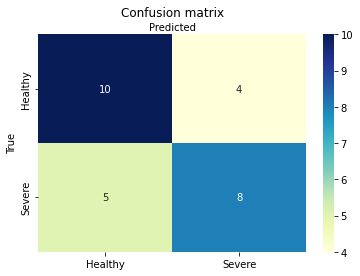

In [48]:
import seaborn as sns

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['Healthy', 'Severe']); ax.yaxis.set_ticklabels(['Healthy', 'Severe']);

#tree plotting


In [28]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.77      0.59      0.67        17

    accuracy                           0.76        42
   macro avg       0.76      0.73      0.74        42
weighted avg       0.76      0.76      0.75        42



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


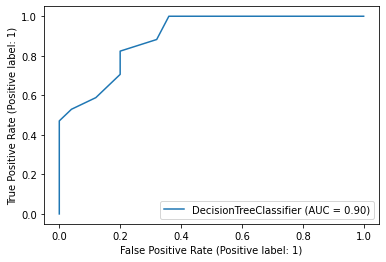

In [32]:
metrics.plot_roc_curve(model, X_test, y_test)

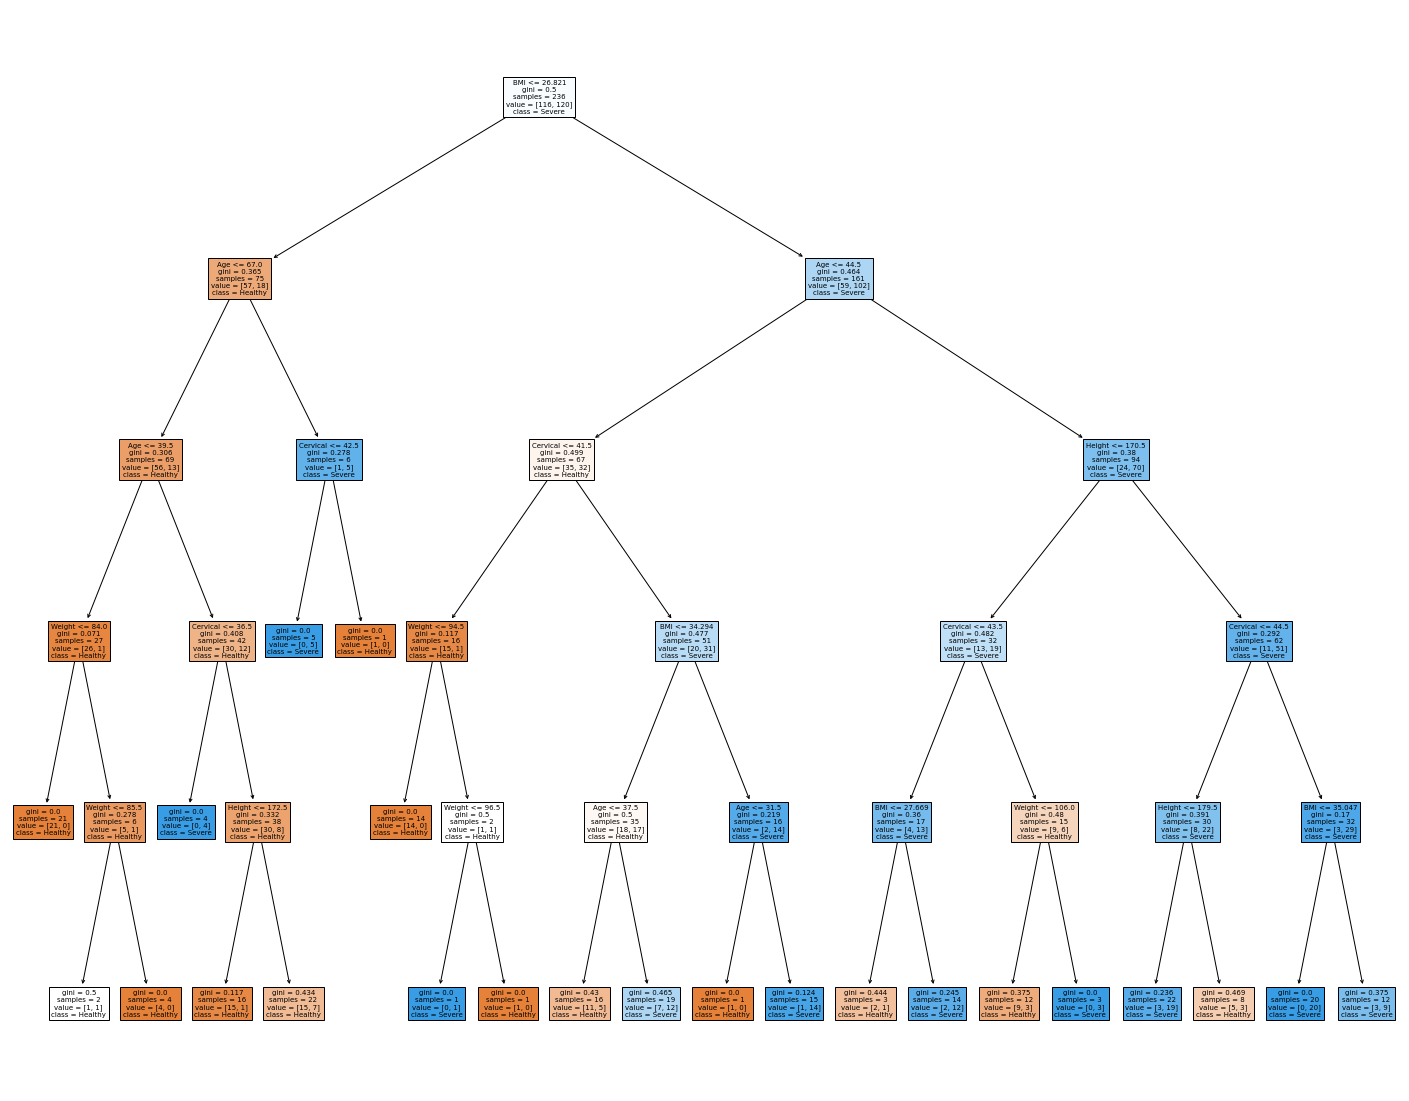

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names = columns,
                   class_names = ['Healthy', 'Severe'],
                   filled=True)
